# Importing Libraries and Data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [4]:
path = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [5]:
df_insurance = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'insurance_checked.csv'), index_col = False)

In [6]:
quandl.ApiConfig.api_key = '8qKyXgv-M_iZYTqfg75B'

In [8]:
quandl.ApiConfig.api_key = '8qKyXgv-M_iZYTqfg75B'
data = quandl.get('FRED/NROUST')

In [9]:
data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [10]:
data.shape

(332, 1)

In [11]:
data.columns

Index(['Value'], dtype='object')

## Task Step 3 - Subset of Data

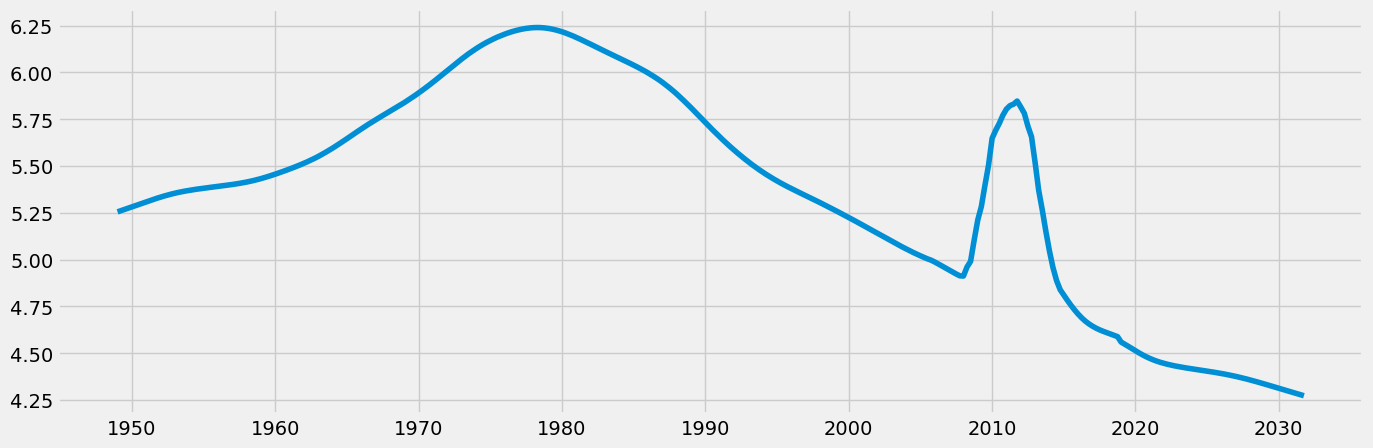

In [12]:
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

Filtered data out from the years 1980 and onward because the data before seems too out of date and not relevant for the analysis

In [14]:
# First, ensure the index is of datetime type
data.index = pd.to_datetime(data.index)

# Now filter the DataFrame to only include rows from 1980 onwards
data_filtered = data[data.index.year >= 1980]

# Check the first few rows to confirm the filtering
data_filtered.head()


,Value
Date,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


# Task Step 4 - Create a linechart

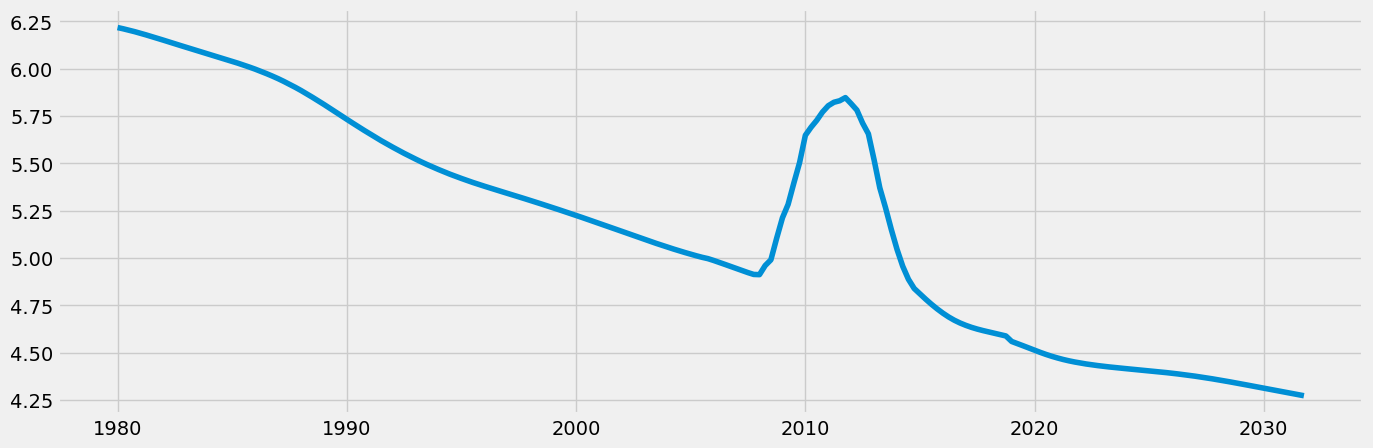

In [16]:
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data_filtered)

## Task Step 5 - Decomposed Data Componenets

In [17]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data_filtered, model='additive')

In [18]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

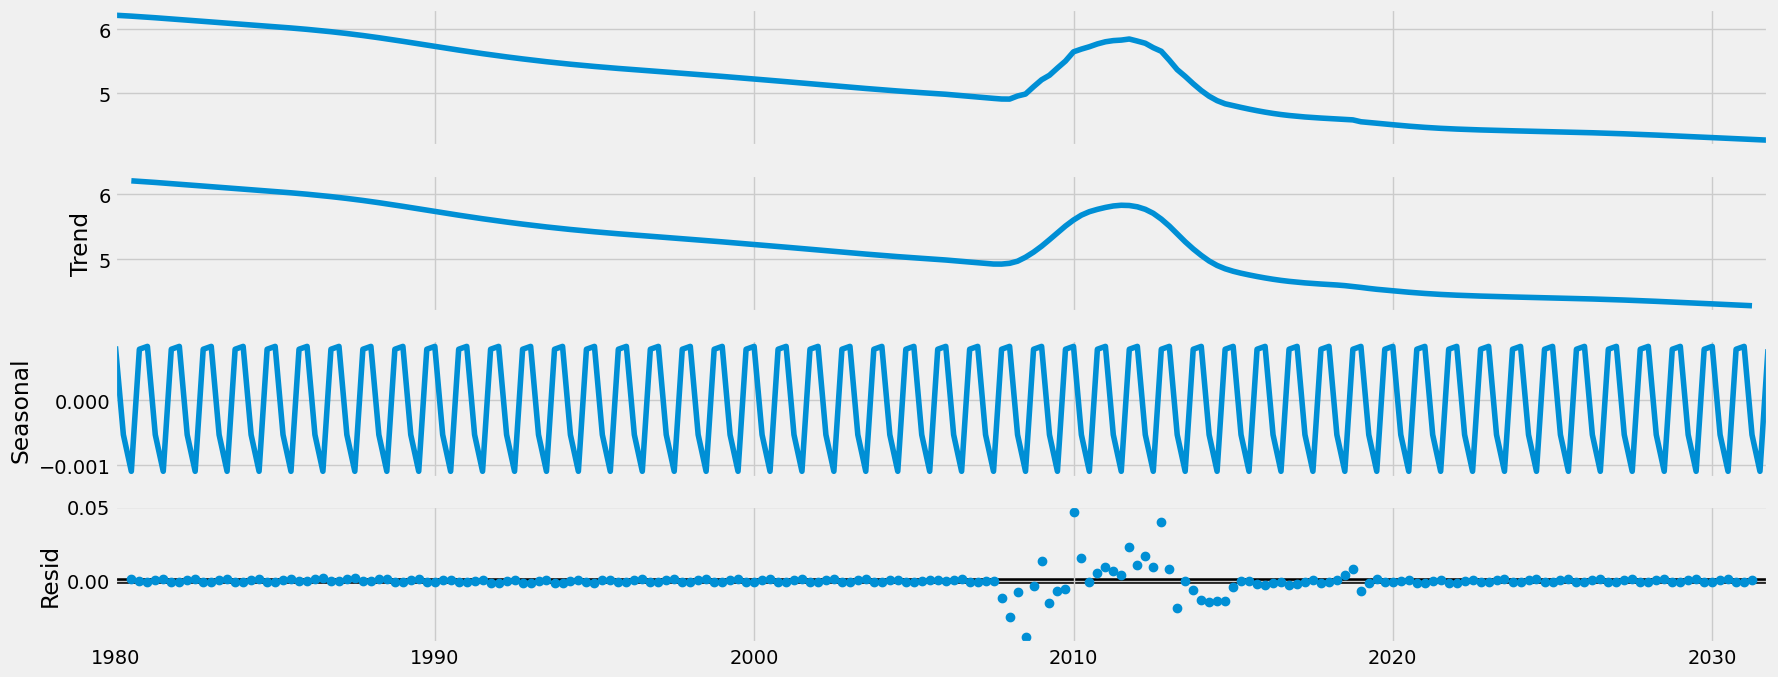

In [19]:
# Plot separate components

decomposition.plot()
plt.show()

The decomposition of the time series data appears to reveal a long-term trend, periodic seasonality, and relatively minor random variations. The trend component suggests a consistent movement over time, which could indicate a steady increase or decrease in the underlying metric. The seasonal pattern is marked by regular fluctuations that repeat at fixed intervals, hinting at predictable seasonal influences on the data. The residuals, ideally scattered randomly around zero, seem to have no significant patterns, implying that the model has captured the primary systematic components in the data effectively. The absence of apparent patterns or trends in the residuals suggests that the model adjustments for trend and seasonality are well-fitted, leaving behind only the unexplained noise.

## Task Step 6 - Dickey Fuller Test

In [20]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_filtered['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.064721
p-value                          0.728934
Number of Lags Used             15.000000
Number of Observations Used    192.000000
Critical Value (1%)             -3.464875
Critical Value (5%)             -2.876714
Critical Value (10%)            -2.574859
dtype: float64


The test statistic is larger than the critical value, so the data must be stationarized.

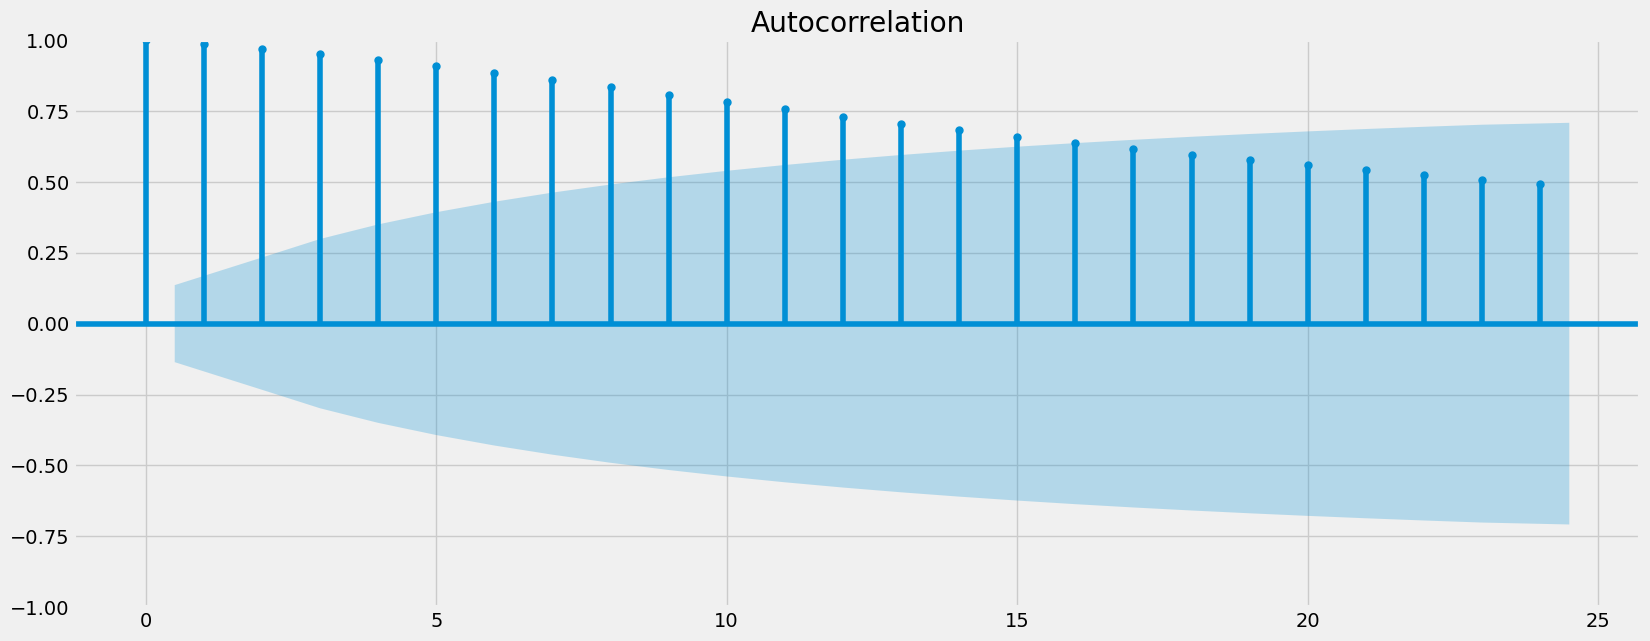

In [21]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_filtered)
plt.show()

Numerous lags exceed the threshold of the confidence interval, indicating a significant correlation among these lags. This high level of autocorrelation in the data corroborates the findings of the Dickey-Fuller test.

## Task Step 7 - Round of differencing

In [22]:
data_diff = data_filtered - data_filtered.shift(1) 

In [23]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [24]:
data_diff.head()

,Value
Date,
1980-04-01,-0.006662
1980-07-01,-0.007321
1980-10-01,-0.007892
1981-01-01,-0.008373
1981-04-01,-0.008762


In [25]:
data_diff.columns

Index(['Value'], dtype='object')

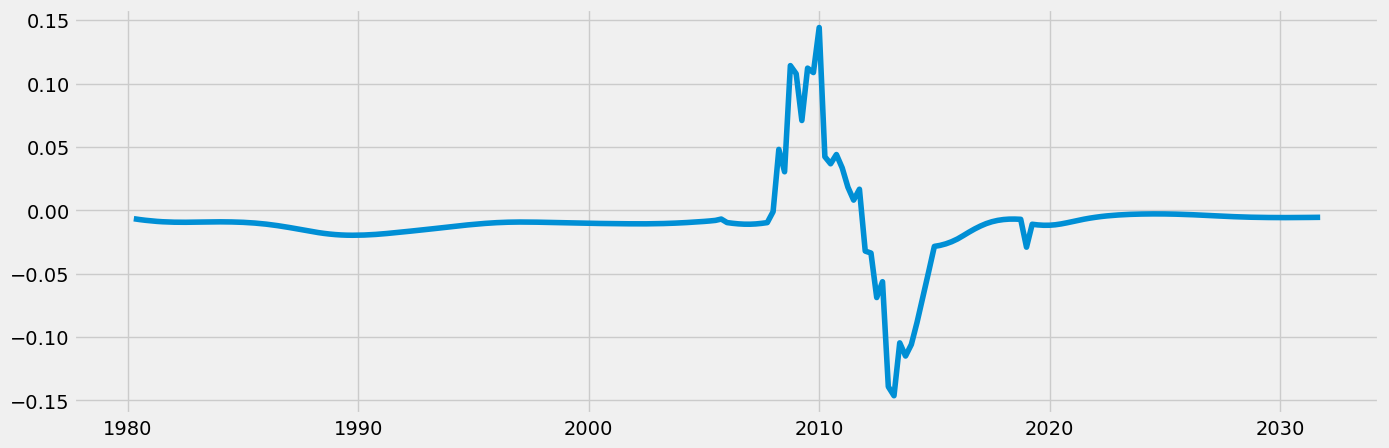

In [26]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
#Re-run Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.126557
p-value                          0.024649
Number of Lags Used             15.000000
Number of Observations Used    191.000000
Critical Value (1%)             -3.465059
Critical Value (5%)             -2.876794
Critical Value (10%)            -2.574901
dtype: float64


Test statistic is now smaller than both the 5% and 10% Critical Values

# Task Step 8 - Additional round of differencing

It will be unecessary

# Task Step 9 - Autocorrelations

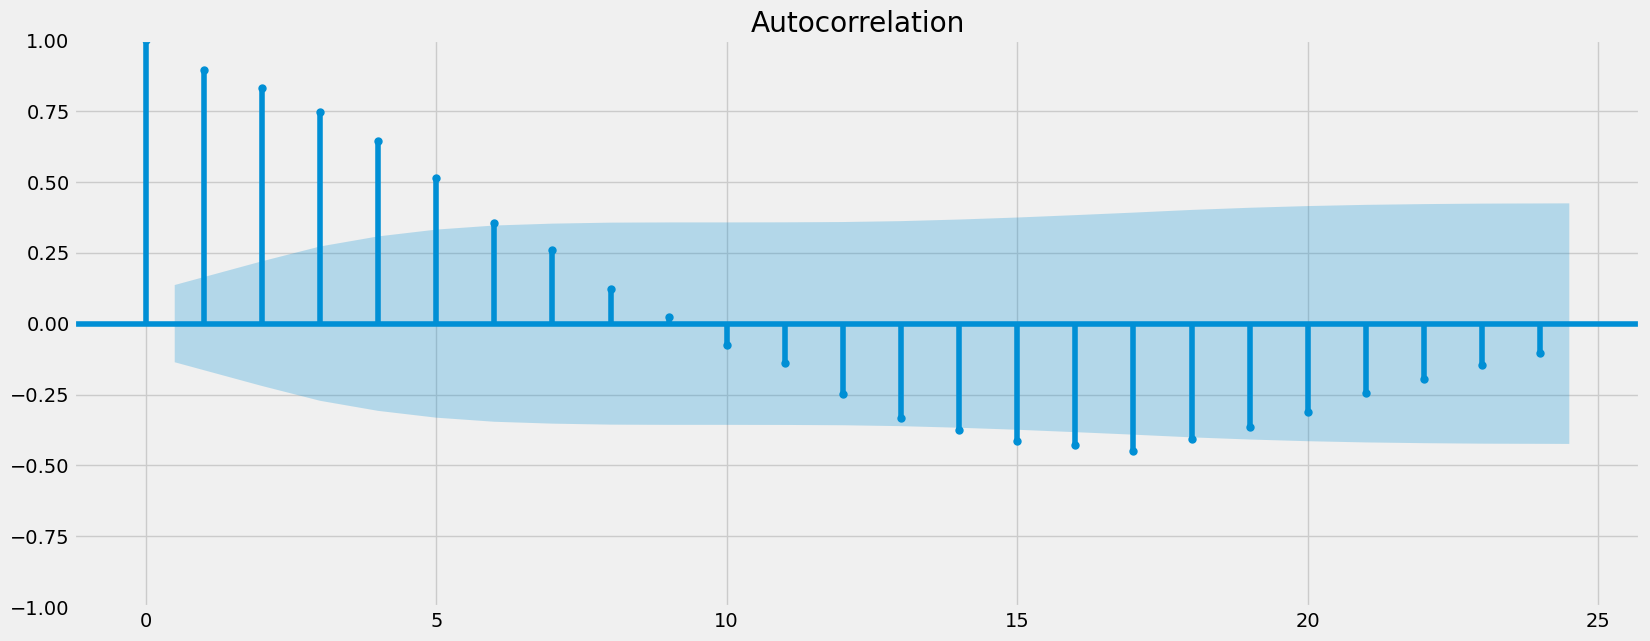

In [28]:
plot_acf(data_diff)
plt.show()

The autocorrelation plot shows that initial lags have a strong positive correlation, but as the lags increase, the correlation decreases, indicating a diminishing memory effect as time progresses.